In [1]:
# Import necessary libraries

import pandas as pd
import datetime
import numpy as np
import datetime as dt
import re

# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt

In [2]:
file_paths = ['GroupLife/GL2011_2012.xlsx',
              'GroupLife/GL2013.xlsx', 
              'GroupLife/2014/GL2014_A.xlsx',
              'GroupLife/2014/GL2014_B.xlsx',
              'GroupLife/2014/GL2014_C.xlsx',
              'GroupLife/2015/GL2015_A.xlsx',
              'GroupLife/2015/GL2015_B.xlsx',
              'GroupLife/2016/GL2016_A.xlsx',
              'GroupLife/2016/GL2016_B.xlsx',
              'GroupLife/GL2017_A.xlsx',
              'GroupLife/GL2017_B.xlsx'
             ]

for file_name in file_paths:
    print(file_name)
    
    #Import the name of the file
    name = pd.read_excel(file_name, engine='openpyxl').iloc[:, : 16]
    
    #Name the file columns in each of the datasets
    name.columns = ['Name_of_Scheme', 'Policy_Number', 
              'Membership_Number', 'Rider', 'Gender', 'Policy_Type', 
              'Status', 'Level_of_Life_Cover', 'Annual_Office_Premium', 
              'Rider_Annual_Premium', 'Date_of_Birth', 'Issue_Date', 'Effective_Date', 
              'Renewal_Date', 'Exit_Date', 'Cause_of_Exit']
    
    
    # Convert the given columns into datetime
    name[['Date_of_Birth', 
          'Issue_Date', 
          'Effective_Date', 
          'Renewal_Date', 
          'Exit_Date']] = name[['Date_of_Birth',
                                'Issue_Date', 
                                'Effective_Date',
                                'Renewal_Date',
                                'Exit_Date']].apply(pd.to_datetime,
                                                    format='%Y-%m-%d %H:%M:%S.%f',
                                                    errors='coerce')
    
    # Convert the Annual Premium and Level of Cover to Numeric
    name[['Level_of_Life_Cover', 
          'Annual_Office_Premium', 
          'Rider_Annual_Premium']] = name[['Level_of_Life_Cover', 
                                           'Annual_Office_Premium',
                                           'Rider_Annual_Premium']].apply(pd.to_numeric, 
                                                                           downcast = 'signed', 
                                                                           errors='coerce')
    
    # replace NaT with NaN
    name.dropna(subset=['Date_of_Birth',
                        'Issue_Date', 
                        'Effective_Date',
                        'Renewal_Date',
                        'Exit_Date'
                       ])
    
    # Create the Year Column 
    name['year']= name['Effective_Date'].dt.strftime('%Y').astype('int64', errors= "ignore")
    
    # Create new Age Column
    name['age']=name['Effective_Date'].dt.year-name['Date_of_Birth'].dt.year
    
    # Create Age Group Column
    bins = [0, 31, 41, 51, 61, 110]
    labels = ['1-30', '31-40', '41-50', '51-60', '61-109']
    name ['agegroup'] = pd.cut(name['age'], bins = bins, labels=labels, right = False )
    
    # Create Sum Assured bands
    bins = [0,100000, 200000, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 100000000]
    labels = ['<100k', '100k-200k', '200k-500k', '500k-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '2.5M-3M', 'Over 3M']
    name ['sum_assured_levels'] = pd.cut(name['Level_of_Life_Cover'], bins = bins, labels=labels, right = False )
    
    # Create Premium Bands
    bins = [0, 1000, 2000, 5000, 7500, 10000, 20000,  5000000]
    labels = ['<1k', '1k-2k', '2k-5k', '5k-7.5k', '7.5k-10k', '10k-20k', 'Over 20k']
    name['premium_levels'] = pd.cut(name['Annual_Office_Premium'], bins = bins, labels=labels, right = False )
    
    
    # Delete Empty Rows
    name = name.dropna(thresh=6)
    
    # Fill empty values on the year column
    # name['year'] = name['year'].fillna(method= 'ffill').fillna(method= 'bfill')
    name['year'] = name['year']
    
   
    # Check in the path to pick the file name
    globals()[file_name.split('/')[-1].split('.')[0]] = name
    
    print(name.shape)

GroupLife/GL2011_2012.xlsx
(250763, 21)
GroupLife/GL2013.xlsx
(761882, 21)
GroupLife/2014/GL2014_A.xlsx
(716220, 21)
GroupLife/2014/GL2014_B.xlsx
(708383, 21)
GroupLife/2014/GL2014_C.xlsx
(474536, 21)
GroupLife/2015/GL2015_A.xlsx
(581214, 21)
GroupLife/2015/GL2015_B.xlsx
(724356, 21)
GroupLife/2016/GL2016_A.xlsx
(435199, 21)
GroupLife/2016/GL2016_B.xlsx
(924226, 21)
GroupLife/GL2017_A.xlsx
(681454, 21)
GroupLife/GL2017_B.xlsx
(75284, 21)


In [3]:
# Concatenate the datasets into one dataframe
gl = pd.concat([GL2011_2012, 
                       GL2013, 
                       GL2014_A, 
                       GL2014_B, 
                       GL2014_C, 
                       GL2015_A, 
                       GL2015_B, 
                       GL2016_A, 
                       GL2016_B, 
                       GL2017_A, 
                       GL2017_B
               ], 
               ignore_index=True)

print(gl.shape)
gl

(6333517, 21)


,Name_of_Scheme,Policy_Number,Membership_Number,Rider,Gender,Policy_Type,Status,Level_of_Life_Cover,Annual_Office_Premium,Rider_Annual_Premium,...,Issue_Date,Effective_Date,Renewal_Date,Exit_Date,Cause_of_Exit,year,age,agegroup,sum_assured_levels,premium_levels
0,NaN,NaN,NaN,FUNERAL COVER,M,GROUP LIFE,NaN,4068000.0,9397.08000,1200.0,...,2011-06-01,2011-06-01,2012-05-31,NaT,NaN,2011,31.0,31-40,Over 3M,7.5k-10k
1,NaN,NaN,NaN,FUNERAL COVER,F,GROUP LIFE,NaN,3060000.0,7313.40000,1200.0,...,2011-06-01,2011-06-01,2012-05-31,NaT,NaN,2011,32.0,31-40,Over 3M,5k-7.5k
2,NaN,NaN,NaN,FUNERAL COVER,F,GROUP LIFE,NaN,3778776.0,11789.78112,1200.0,...,2011-06-01,2011-06-01,2012-05-31,NaT,NaN,2011,37.0,31-40,Over 3M,10k-20k
3,NaN,NaN,NaN,FUNERAL COVER,F,GROUP LIFE,NaN,2786400.0,13430.44800,1200.0,...,2011-06-01,2011-06-01,2012-05-31,NaT,NaN,2011,44.0,41-50,2.5M-3M,10k-20k
4,NaN,NaN,NaN,FUNERAL COVER,M,GROUP LIFE,NaN,1168344.0,5631.41808,1200.0,...,2011-06-01,2011-06-01,2012-05-31,NaT,NaN,2011,45.0,41-50,1M-1.5M,5k-7.5k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.00000,265.0,...,2017-01-01,2017-01-01,2018-01-01,NaT,NaN,2017,NaN,NaN,NaN,<1k
6333513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.00000,265.0,...,2017-01-01,2017-01-01,2018-01-01,NaT,NaN,2017,NaN,NaN,NaN,<1k
6333514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.00000,265.0,...,2017-01-01,2017-01-01,2018-01-01,NaT,NaN,2017,NaN,NaN,NaN,<1k
6333515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.00000,265.0,...,2017-01-01,2017-01-01,2018-01-01,NaT,NaN,2017,NaN,NaN,NaN,<1k


# Annual Number of Members

Annual Coverage 
 year
1900          2
1959          1
1962          3
1963          1
1970          2
1971          1
1980          2
1987          2
1991          1
1999        411
2000        121
2001        274
2002       5647
2003       1789
2004        828
2005        948
2006        932
2007       3964
2008       2866
2009       2831
2010       4890
2011     130880
2012     131009
2013     777195
2014    1835488
2015     951338
2016    1083278
2017     258800
2018       2180
2127          1
2128          1
Name: year, dtype: int64


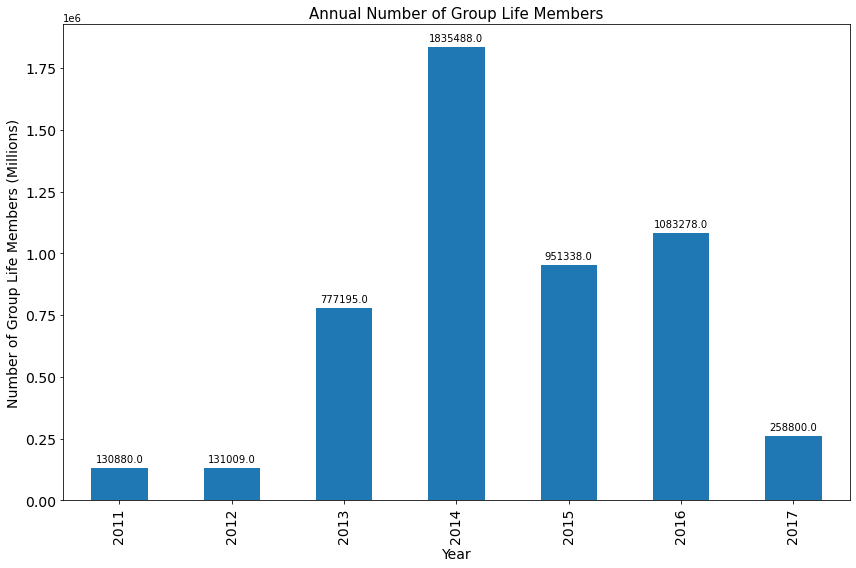

In [4]:
#Plot figures
gl_numbers= gl.groupby(['year'])['year'].count()
print("Annual Coverage \n",gl_numbers)

plt.figure(figsize=(12,8))
ax = gl_numbers.loc['2011':'2017'].plot(kind='bar',  fontsize = 14)
# for index, value in enumerate():
#     plt.text(value, index, str(value))
ax.set_title('Annual Number of Group Life Members',  fontsize = 15)
ax.set_xlabel('Year',  fontsize = 14)
ax.set_ylabel('Number of Group Life Members (Millions)',  fontsize = 14)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.tight_layout()

plt.show()

# Age bands, if data available

Members' Age Groups 
 agegroup
1-30       542316
31-40     1427174
41-50     1287660
51-60      880335
61-109      20184
Name: agegroup, dtype: int64


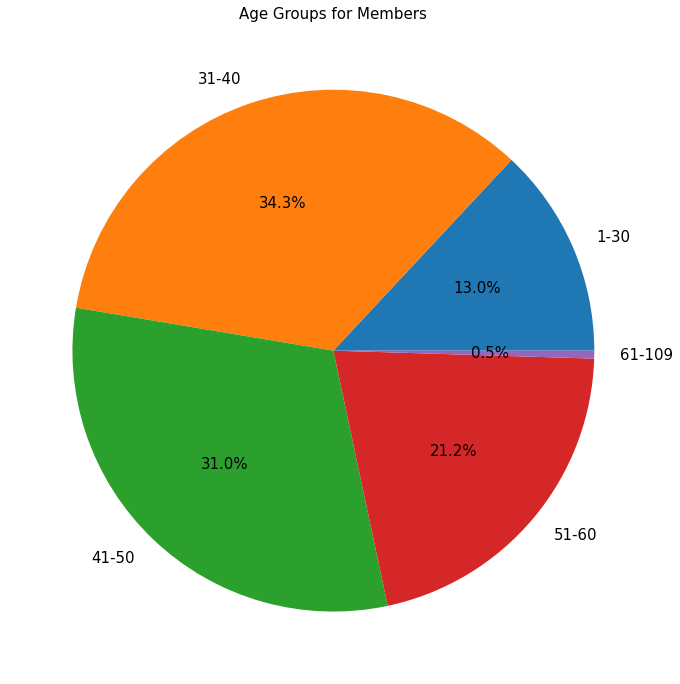

In [5]:
# Age bands, if data available
#Plot figures
gl_numbers= gl.groupby(['agegroup'])['agegroup'].count()
print("Members' Age Groups \n",gl_numbers)

plt.figure(figsize=(12,12))
ax = gl_numbers.plot(kind='pie', autopct='%1.1f%%', fontsize = 15)

ax.set_title('Age Groups for Members', fontsize = 15)
# ax.set_xlabel('Age Groups', fontsize = 15)
ax.set_ylabel('')

plt.show()

# Sum assured bands

count       3313069
unique            9
top       200k-500k
freq         886313
Name: sum_assured_levels, dtype: object
Sum Assured Bands 
 sum_assured_levels
<100k        592087
100k-200k    686530
200k-500k    886313
500k-1M      325082
1M-1.5M      191486
1.5M-2M      117017
2M-2.5M       87403
2.5M-3M       62257
Over 3M      364894
Name: sum_assured_levels, dtype: int64


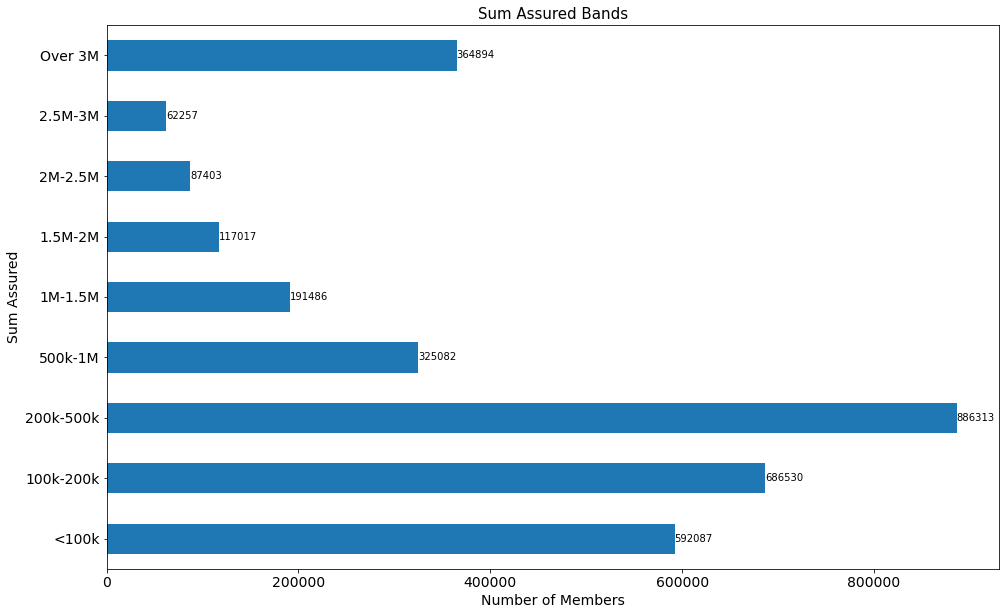

In [6]:
# Create Sum Assured

print(gl ['sum_assured_levels'].describe())

sum_assured = gl.groupby(['sum_assured_levels'])['sum_assured_levels'].count()
print('Sum Assured Bands \n', sum_assured)
plt.figure(figsize=(16,10))
ax = sum_assured.plot(kind='barh', fontsize = 14)
 
ax.set_title('Sum Assured Bands', fontsize = 15)
ax.set_xlabel('Number of Members',  fontsize = 14)
ax.set_ylabel('Sum Assured', fontsize = 14)

for i, v in enumerate(sum_assured):
    ax.text(v+0.2, i, str(round(v, 2)), va="center")

In [7]:
gl['Level_of_Life_Cover'].describe()

count    3.709718e+06
mean     3.005319e+08
std      1.893320e+09
min     -1.316580e+05
25%      1.500000e+05
50%      3.000000e+05
75%      1.926216e+06
max      2.789025e+10
Name: Level_of_Life_Cover, dtype: float64

# Annual Premiums

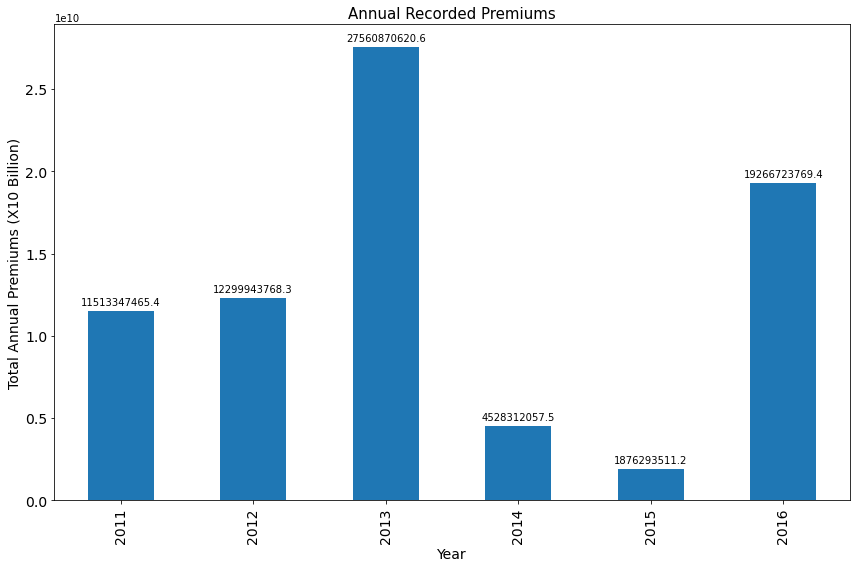

In [8]:

gl['Annual_Office_Premium'] = pd.to_numeric(gl['Annual_Office_Premium'], downcast = 'signed', errors='coerce')
annual_premiums= gl.groupby(['year'])['Annual_Office_Premium'].sum()

plt.figure(figsize=(12,8))
ax = annual_premiums.loc['2011':'2016'].plot(kind = 'bar', fontsize = 14)

ax.set_title('Annual Recorded Premiums', fontsize = 15)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Total Annual Premiums (X10 Billion)', fontsize = 14)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tight_layout()


# Premium Bands

count     4173831
unique          7
top           <1k
freq      1990101
Name: premium_levels, dtype: object
Office Premium Bands 
 premium_levels
<1k         1990101
1k-2k        207722
2k-5k        799231
5k-7.5k      259803
7.5k-10k     119390
10k-20k      221387
Over 20k     576197
Name: premium_levels, dtype: int64


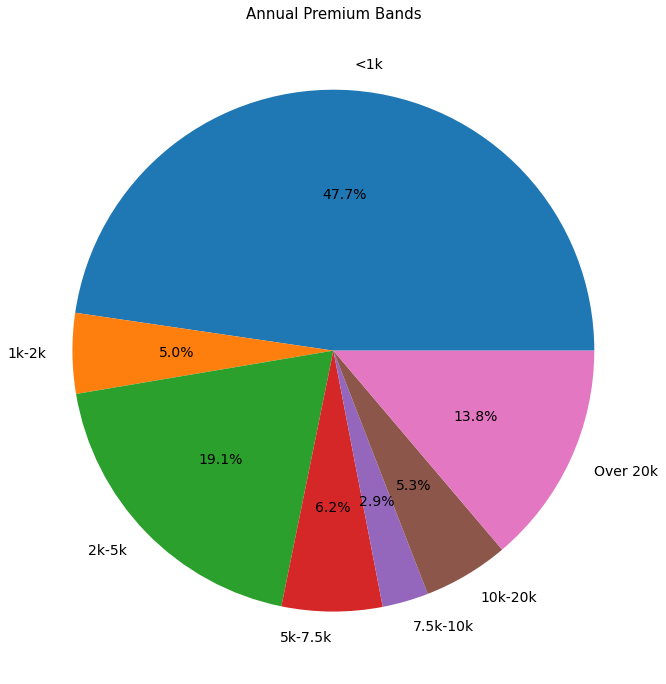

In [9]:

print(gl['premium_levels'].describe())

premium_levels = gl.groupby(['premium_levels'])['premium_levels'].count()
print('Office Premium Bands \n', premium_levels)
plt.figure(figsize=(12,12))
ax = premium_levels.plot(kind='pie', autopct='%1.1f%%', fontsize = 14)

ax.set_title('Annual Premium Bands', fontsize = 15)
# ax.set_xlabel('Annual Premiums', fontsize = 14)
# ax.set_ylabel('Number of Members', fontsize = 14)
ax.set_ylabel('')
plt.show()

# Average Annual Premiums

Annual Office Premium 
 year
1900    2.073000e+04
1959    5.554500e+03
1962    5.572000e+03
1963    1.176840e+04
1970    9.759952e+06
1971    2.520000e+03
1980    9.134124e+05
1987    1.223876e+06
1991    1.428000e+04
1999    3.350884e+06
2000    3.992314e+06
2001    2.679610e+06
2002    5.165768e+06
2003    3.484259e+06
2004    3.313342e+06
2005    3.900627e+06
2006    4.506153e+06
2007    2.181512e+06
2008    2.666482e+06
2009    2.307241e+06
2010    1.477315e+06
2011    9.060848e+04
2012    9.819452e+04
2013    3.653679e+04
2014    3.353135e+03
2015    5.596299e+03
2016    1.274718e+05
2017    1.845890e+04
2018    8.919133e+03
2127    2.822892e+04
2128    1.990369e+04
Name: Annual_Office_Premium, dtype: float64


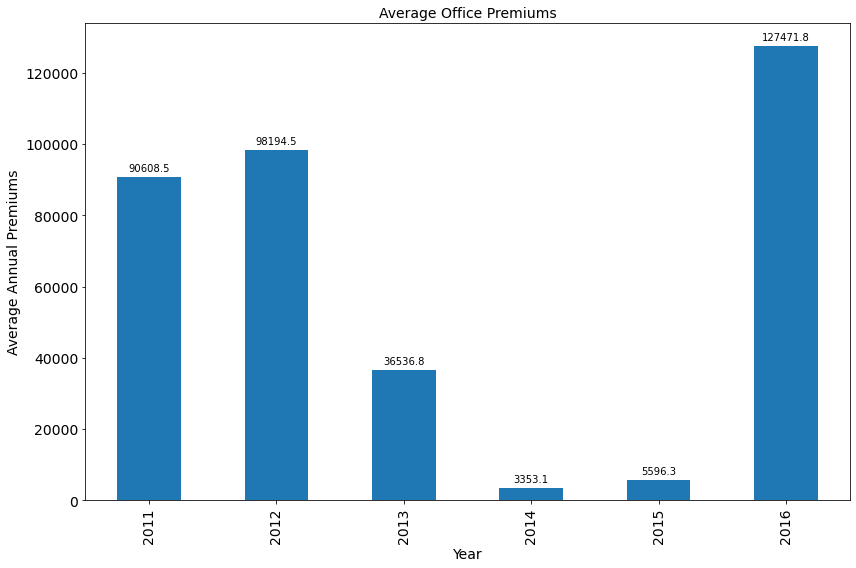

In [10]:
# Average Annual Premiums
#Plot figures
gl_numbers= gl.groupby(['year'])['Annual_Office_Premium'].mean()
print("Annual Office Premium \n",gl_numbers)

plt.figure(figsize=(12,8))
ax = gl_numbers.loc['2011':'2016'].plot(kind='bar', fontsize = 14)
# for index, value in enumerate():
#     plt.text(value, index, str(value))
ax.set_title('Average Office Premiums', fontsize = 14)
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Average Annual Premiums', fontsize = 14)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.tight_layout()

plt.show()

# Chart of Additional Benefits (Riders)

In [11]:
# Replace Annuity types with the same meaning
gl['Rider'] = gl['Rider'].replace(['01','FC','FUNERAL COVER', 'LAST EXPENSE','Funeral cover','LE','Funeral'],'Funeral Cover')

gl['Rider'] = gl['Rider'].replace(['CI','Sickness', 'Illness'],'Critical Illness')

gl['Rider'] = gl['Rider'].replace(['1,0,0,0,5,0,0,0'],'Funeral Cover, Critical Illness')

gl['Rider'] = gl['Rider'].replace(['Rider'],'Main Benefit')

Frequency of Riders 
 Rider
Funeral Cover                         1059393
FUNERAL COVER;PTD;CRITICAL ILLNESS     579980
Group Life                             371700
Disability                             159360
MAIN BENEFIT                            86608
Last Expense                            70672
Critical Illness Accelerated            65723
Permanent And Total Disability          63366
Critical Illness                        47848
Group Last Expense                      44423
Last Expense Accelerated                37997
MAIN COVER                              37974
Name: Rider, dtype: int64


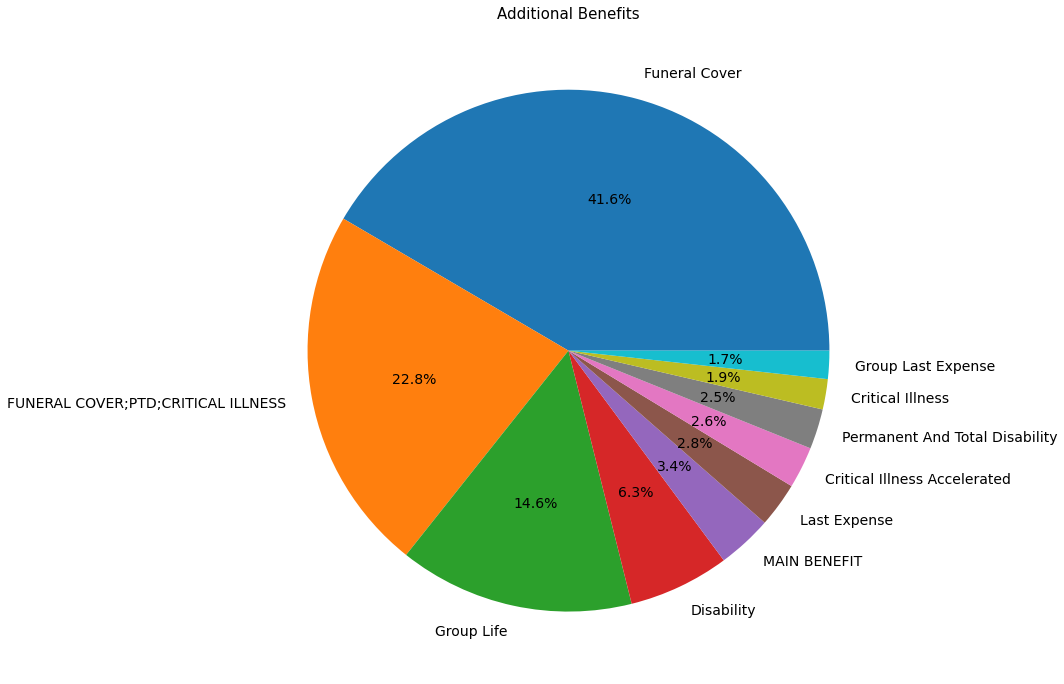

In [12]:
# Exclude some column
rider= gl[(gl.Rider != 'NONE') & (gl.Rider != 1) & (gl.Rider != '0,0,0,0,0,0,0')]
# Additional covers
gl_rider= rider.groupby(['Rider'])['Rider'].count().sort_values(ascending = False)
print("Frequency of Riders \n",gl_rider[:12])

plt.figure(figsize=(12,12))
ax = gl_rider[:10].plot(kind='pie', autopct='%1.1f%%', fontsize = 14)

ax.set_title('Additional Benefits', fontsize = 15)
# ax.set_xlabel('Age Groups')
ax.set_ylabel('')

plt.show()

In [13]:
rider = gl.loc[gl['Rider']== '1,0,0,0,5,0,0,0']
rider

,Name_of_Scheme,Policy_Number,Membership_Number,Rider,Gender,Policy_Type,Status,Level_of_Life_Cover,Annual_Office_Premium,Rider_Annual_Premium,...,Issue_Date,Effective_Date,Renewal_Date,Exit_Date,Cause_of_Exit,year,age,agegroup,sum_assured_levels,premium_levels


In [ ]:
# Industry of lives covered


# Age bands, if data available


# Period between date of death and when death reported


# Period between date of death of when claim is paid


# Types of claims (pie chart)


# Sum assured bands


# Premium bands

In [ ]:
GL2017_A

In [ ]:
gl.to_csv(r'combined_csv/group_life.csv')

In [16]:
# file_paths = ['GroupLife/GL2011_2012.xlsx',
#               'GroupLife/GL2013.xlsx', 
# # 'GroupLife/2014/GL2014_A.xlsx',
# # 'GroupLife/2014/GL2014_B.xlsx',
# # 'GroupLife/2014/GL2014_C.xlsx',
# # 'GroupLife/2015/GL2015_A.xlsx',
# # 'GroupLife/2015/GL2015_B.xlsx',
# # 'GroupLife/2016/GL2016_A.xlsx',
# # 'GroupLife/2016/GL2016_B.xlsx',
# # 'GroupLife/GL2017_A.xlsx',
# # 'GroupLife/GL2017_B.xlsx'
#              ]

# for file_name in file_paths:
#     #Check in the path to pick the file name
    
#     #Import the name of the file
#     name = pd.read_excel(file_name, engine='openpyxl').iloc[:, : 16]
    
    
#     #Name the file columns in each of the datasets
#     name.columns = ['Name_of_Scheme', 'Policy_Number', 
#               'Membership_Number', 'Rider', 'Gender', 'Policy_Type', 
#               'Status', 'Level_of_Life_Cover', 'Annual_Office_Premium', 
#               'Rider_Annual_Premium', 'Date_of_Birth', 'Issue_Date', 'Effective_Date', 
#               'Renewal_Date', 'Exit_Date', 'Cause_of_Exit']
    
#     # Convert the given columns into datetime
#     name[['Date_of_Birth', 
#           'Issue_Date', 
#           'Effective_Date', 
#           'Renewal_Date', 
#           'Exit_Date']] = name[['Date_of_Birth',
#                                 'Issue_Date', 
#                                 'Effective_Date',
#                                 'Renewal_Date',
#                                 'Exit_Date']].apply(pd.to_datetime,
#                                                     format='%Y-%m-%d %H:%M:%S.%f',
#                                                     errors='coerce')
  
#     # Convert the Annual Premium and Level of Cover to Numeric
#     name[['Level_of_Life_Cover', 
#           'Annual_Office_Premium', 
#           'Rider_Annual_Premium']] = name[['Level_of_Life_Cover', 
#                                            'Annual_Office_Premium',
#                                            'Rider_Annual_Premium']].apply(pd.to_numeric, 
#                                                                            downcast = 'signed', 
#                                                                            errors='coerce')
    
#     # replace NaT with NaN
#     name.dropna(subset=['Date_of_Birth',
#                         'Issue_Date', 
#                         'Effective_Date',
#                         'Renewal_Date',
#                         'Exit_Date'
#                        ])
    
#     # Create the Year Column 
#     name['year']= name['Effective_Date'].dt.strftime('%Y').astype('int64', errors= "ignore")
    
#     # Create new Age Column
#     name['age']=name['Effective_Date'].dt.year-name['Date_of_Birth'].dt.year
    
#     # Create Age Group Column
#     bins = [0, 21, 31, 41, 51, 61, 71, 110]
#     labels = ['1-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-109']
#     name ['agegroup'] = pd.cut(name['age'], bins = bins, labels=labels, right = False )
    
#     # Delete Empty Rows
#     name = name.dropna(thresh=8)
    
#     # Fill empty values on the year column
#     name = name.fillna(method= 'ffill').fillna(method= 'bfill')
    
#     globals()[file_name.split('/')[-1].split('.')[0]] = name
    
#     print(name.shape)
#     #print(name.sample(10))
    
    

In [17]:
# # Concatenate the datasets into one dataframe
# gl = pd.concat([GL2011_2012, 
#                        GL2013, 
#                ], 
#                ignore_index=True)

# print(gl.shape)
# gl

In [18]:
# # Create Premium Bands
# bins = [0, 1000, 2000, 5000, 7500, 10000, 20000,  5000000]
# labels = ['<1k', '1k-2k', '2k-5k', '5k-7.5k', '7.5k-10k', '10k-20k', 'Over 20k']
# gl['premium_levels'] = pd.cut(gl['Annual_Office_Premium'], bins = bins, labels=labels, right = False )
# print(gl['premium_levels'].describe())

# premium_levels = gl.groupby(['premium_levels'])['premium_levels'].count()
# print('Office Premium Bands \n', premium_levels)
# plt.figure(figsize=(12,12))
# ax = premium_levels.plot(kind='pie')

# ax.set_title('Annual Premium Bands')
# ax.set_xlabel('Annual Premiums')
# ax.set_ylabel('Number of Policies')

In [19]:
GL2013

,Name_of_Scheme,Policy_Number,Membership_Number,Rider,Gender,Policy_Type,Status,Level_of_Life_Cover,Annual_Office_Premium,Rider_Annual_Premium,...,Issue_Date,Effective_Date,Renewal_Date,Exit_Date,Cause_of_Exit,year,age,agegroup,sum_assured_levels,premium_levels
2,NaN,NaN,NaN,MAIN BENEFIT,M,GL,IN-FORCE,NaN,46360.074356,0.0,...,NaT,2013-08-30,2014-08-30,NaT,NaN,2013,37.0,31-40,NaN,Over 20k
3,NaN,NaN,NaN,MAIN BENEFIT,F,GL,IN-FORCE,NaN,6417.632181,0.0,...,NaT,2013-08-30,2014-08-30,NaT,NaN,2013,27.0,1-30,NaN,5k-7.5k
4,NaN,NaN,NaN,MAIN BENEFIT,M,GL,IN-FORCE,NaN,15307.505698,0.0,...,NaT,2013-08-30,2014-08-30,NaT,NaN,2013,34.0,31-40,NaN,10k-20k
5,NaN,NaN,NaN,MAIN BENEFIT,F,GL,IN-FORCE,NaN,38505.306296,0.0,...,NaT,2013-08-30,2014-08-30,NaT,NaN,2013,38.0,31-40,NaN,Over 20k
6,NaN,NaN,NaN,MAIN BENEFIT,M,GL,IN-FORCE,NaN,22943.075862,0.0,...,NaT,2013-08-30,2014-08-30,NaT,NaN,2013,35.0,31-40,NaN,Over 20k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762160,NaN,NaN,NaN,NaN,M,GLA,Active,1523808.0,4647.614400,NaN,...,2013-12-01,2013-12-01,2014-12-01,NaT,NaN,2013,NaN,NaN,1.5M-2M,2k-5k
762161,NaN,NaN,NaN,NaN,M,GLA,Active,1008000.0,3074.400000,NaN,...,2013-12-01,2013-12-01,2014-12-01,NaT,NaN,2013,NaN,NaN,1M-1.5M,2k-5k
762162,NaN,NaN,NaN,NaN,F,GLA,Active,693360.0,2114.748000,NaN,...,2013-12-01,2013-12-01,2014-12-01,NaT,NaN,2013,NaN,NaN,500k-1M,2k-5k
762163,NaN,NaN,NaN,NaN,M,GLA,Active,3060000.0,9333.000000,NaN,...,2013-12-01,2013-12-01,2014-12-01,NaT,NaN,2013,49.0,41-50,Over 3M,7.5k-10k
